# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 2</span>

In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import optimize

def FileImport (nomefile=None, data_array=None):
    with open(nomefile) as fileinput:
        lettore = csv.reader(fileinput,delimiter="\t", quoting=csv.QUOTE_NONNUMERIC)
        for riga in lettore:
            for dato in riga:
                if type(dato)==float:
                    dato = dato
                    data_array.append(dato)
                    
def FileImportCol (nomefile=None, data_array=None, i=None):
    with open(nomefile) as fileinput:
        f=open(nomefile, 'r')
        lines=f.readlines()
        for x in lines:
            data_array.append(float(x.split()[i]))
        f.close()
                    
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
    
def fit_funct(x, k):
    return k*np.sqrt(x)

# <span style="color:red"> Exercise 02.1 </span>

# Monte Carlo
In this exercise I computed the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos \left( \frac{\pi}{2} x \right) dx = 1$$

1. Sampling a **uniform distribution** in $[0,1]$.

Below the picture of I and its uncertainties with *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

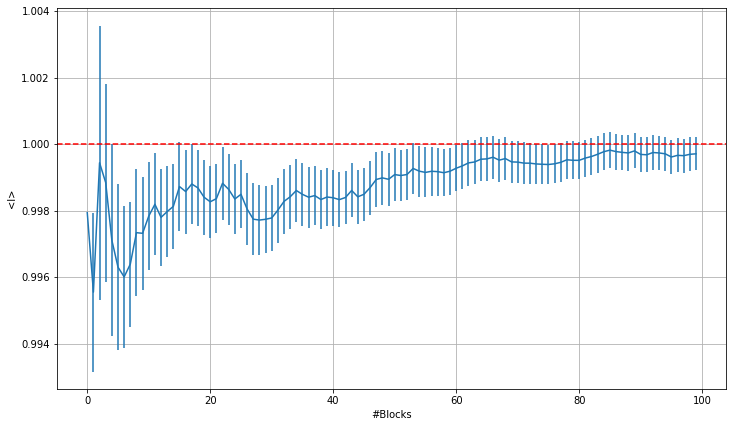

In [2]:
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
ave_unif = []
ave2_unif = np.zeros(N)
sum_prog_unif = np.zeros(N)
su2_prog_unif = np.zeros(N)
err_prog_unif = np.zeros(N)
FileImport ("../Es2/2.1.1/mu", ave_unif)

for i in range(N):
    ave2_unif[i] = (ave_unif[i])**2
for i in range(N):
    for j in range(i+1):
        sum_prog_unif[i] += ave_unif[j] 
        su2_prog_unif[i] += ave2_unif[j]
    sum_prog_unif[i]/=(i+1) # Cumulative average
    su2_prog_unif[i]/=(i+1) # Cumulative square average
    err_prog_unif[i] = error(sum_prog_unif,su2_prog_unif,i) # Statistical uncertainty

x=np.arange(100) # Number of throws = block * (Number of throws in each block)

plt.figure(figsize=(12, 7))
plt.errorbar(x,sum_prog_unif,yerr=err_prog_unif, label='Estimated value')
plt.axhline(1, color='r', linestyle='--', label='Expected value')
plt.xlabel('#Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

2. Using **importance sampling**.

In this part of the exercise I made a computation of $I$, sampling $x$ with a non-uniform probability $p(x)$. I choose to use a $p(x)=2(1-x)$ because well approximate the function in the interval.
The mean of $\frac{g(x)}{p(x)}$, with $x$ sampled with p(x), is a good approximation for $I$:

$$I \approx \frac{1}{N} \sum{\frac{\pi}{4}\frac{cos(\frac{\pi}{2}x)}{1-x}} $$

So I generated uniform numbers $s$ in $[0,1)$, then I evaluated $x=1-\sqrt{1-s}$ (the inverse of the cumulative of the DDP) and I used $x$ to evaluate the integral.

Below the picture of $I$ and its uncertainties with $𝑀=10^6$ throws, as a function of the number of blocks, $𝑁=100$. 

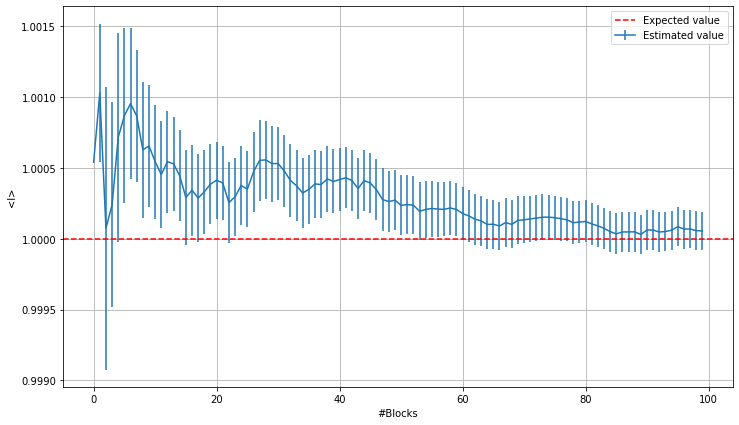

In [3]:
ave_p = []
ave2_p = np.zeros(N)
sum_prog_p = np.zeros(N)
su2_prog_p = np.zeros(N)
err_prog_p = np.zeros(N)
FileImport ("../Es2/2.1.2/mu_p", ave_p)

for i in range(N):
    ave2_p[i] = (ave_p[i])**2
    
for i in range(N):
    for j in range(i+1):
        sum_prog_p[i] += ave_p[j] 
        su2_prog_p[i] += ave2_p[j]
    sum_prog_p[i]/=(i+1) # Cumulative average
    su2_prog_p[i]/=(i+1) # Cumulative square average
    err_prog_p[i] = error(sum_prog_p,su2_prog_p,i) # Statistical uncertainty
x=np.arange(100)
plt.figure(figsize=(12, 7))
plt.errorbar(x,sum_prog_p,yerr=err_prog_p, label='Estimated value')
plt.axhline(1, color='r', linestyle='--', label='Expected value')
plt.xlabel('#Blocks')
plt.ylabel('<I>')
plt.legend()
plt.grid(True)
plt.show()

# <span style="color:red"> Exercise 02.2 </span>

# Random Walk

For this exercise I made a 3D Random Walks (RW) on a cubic lattice and in the continuum. I repeated $10^6$ times the simulation of a random walk in 3D always starting at the origin.

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$

Here there are 6 possible step, determined by the 3 spatial directions and the 2 orientations. So I will generate evenly distributed numbers in $[0,1)$, I will divide the interval $[0,1)$ in 6 equal subintervals and I will choose the step based on the sub-interval in which the random numbers fall. In this way I have the same probability for each discrete step.

Below the pictures of the collected data

k of the fit =  0.92155773509395


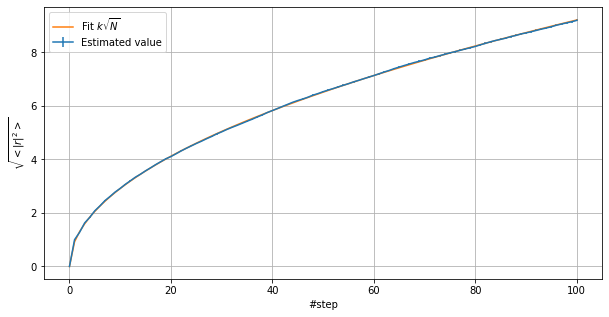

In [10]:
n, RW, err_RW = [], [], []
FileImportCol("../Es2/2.2/discrete_lenghts",n, 0)
FileImportCol("../Es2/2.2/discrete_lenghts", RW, 1)
FileImportCol("../Es2/2.2/discrete_lenghts", err_RW, 2)

params, params_covar = optimize.curve_fit(fit_funct, n, RW)
print("k of the fit = ", params[0])
    
x_block = np.arange(100)
plt.figure(figsize=(10,5))
plt.errorbar(n, RW, yerr=err_RW, label='Estimated value')
plt.plot(n, fit_funct(n, params), label="Fit $k\sqrt{N}$")
plt.xlabel('#step')
plt.ylabel('$\sqrt{<|r|^2>}$')
plt.legend()
plt.grid(True)
plt.show()

2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Here I have to sample a random vector with magnitude equal to 1 in 3D space, so I will generate evenly distributed numbers in $[0,2\pi]$ to represent the $\phi$ angle and I have to generate the $\theta$ angle such that $p_{\theta}(\theta)=\frac{1}{2}sin\theta$. In this way 
$$F_{\theta}(\theta)=\int _0 ^\theta \frac{1}{2}sin\theta'd\theta'=\frac{1}{2}(1-cos\theta)$$
and $\theta=acos(1-2r)$ with r evenly generated in $[0,1)$

Below the pictures of the collected data

k of the fit =  0.9251121621396428


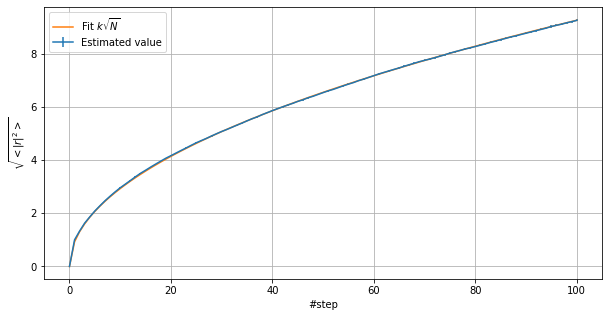

In [11]:
n, RW, err_RW = [], [], []
FileImportCol("../Es2/2.2/continuum_lenghts",n, 0)
FileImportCol("../Es2/2.2/continuum_lenghts", RW, 1)
FileImportCol("../Es2/2.2/continuum_lenghts", err_RW, 2)

params, params_covar = optimize.curve_fit(fit_funct, n, RW)
print("k of the fit = ", params[0])
    
x_block = np.arange(100)
plt.figure(figsize=(10,5))
plt.errorbar(n, RW, yerr=err_RW, label='Estimated value')
plt.plot(n, fit_funct(n, params), label="Fit $k\sqrt{N}$")
plt.xlabel('#step')
plt.ylabel('$\sqrt{<|r|^2>}$')
plt.legend()
plt.grid(True)
plt.show()

We can see that there is a diffusive behavior in both examples. This is because a random walk in 3D space acts like the corrispective in 1D, so following 
$$ \frac{\partial p(\vec{x},t)}{\partial t} = D \bigtriangledown ^2 p(\vec{x},t) $$
Due to the corrispondance between the limit distribution of CLT and the one of a random walk, we have $<x^2(t)>=2Dt=Na^2$, so we can see that our $\sqrt{<|r|^2>}$ with $a=1$ goes how $\sqrt{N}$.
